In [1]:
# importing all required libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import os
from statistics import mode, mean, median

# visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Tranform
from scipy.stats import boxcox
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats

In [2]:
# Read CSV File from Data Folder
filename = "cfs_pumf.txt"

# check if data is in current folder. If not, go one step back 
if "data" in os.listdir():
    print("Found data folder")
else:
    os.chdir("../")
    
try:
    dataset = pd.read_csv(f'{os.getcwd()}\\data\\{filename}') 
    print("Dataset is loaded")
except IOError:
    print(f'Could not find the data file {filename}')

Dataset is loaded


In [3]:
# Analyze first and last 10 rows
display("First 10 observations", dataset.head(10))
display("Last 10 observations", dataset.tail(10))

'First 10 observations'

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1
5,6,24,47900,24-47900,30,99999,30-99999,337,2,40,4,3716,1132,1942,2265,N,Y,C,N,21.9
6,7,19,99999,19-99999,19,99999,19-99999,337,3,26,5,43738,13501,16,22,N,N,N,N,310.5
7,8,6,41740,06-41740,6,99999,06-99999,4239,1,40,14,77,4,272,306,N,N,N,N,138.5
8,9,19,99999,19-99999,19,99999,19-99999,327,3,31,5,338,12826,10,15,N,N,N,N,2695.9
9,10,13,99999,13-99999,13,99999,13-99999,4237,2,34,5,145,22,21,28,N,N,N,N,489.1


'Last 10 observations'

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
4547651,4547652,39,99999,39-99999,39,99999,39-99999,323,2,29,4,247,62,20,29,N,N,N,N,129.5
4547652,4547653,51,40060,51-40060,37,450,37-450,321,3,26,5,3371,26250,158,173,N,N,N,N,280.8
4547653,4547654,19,99999,19-99999,17,99999,17-99999,4234,3,21,5,23587,4718,172,182,N,N,N,N,175.3
4547654,4547655,12,422,12-422,29,99999,29-99999,332,3,33,4,6804,1201,886,1216,N,N,N,N,63.0
4547655,4547656,48,206,48-206,48,206,48-206,4237,3,33,5,1820,38,3,5,N,N,N,N,1679.3
4547656,4547657,9,408,09-408,34,408,34-408,323,4,29,14,7988,133,122,152,N,N,N,N,260.6
4547657,4547658,39,178,39-178,28,99999,28-99999,311,3,05,4,50808,29887,561,683,Y,N,N,N,20.0
4547658,4547659,36,408,36-408,36,408,36-408,336,4,36,5,685,137,13,16,N,N,N,N,164.3
4547659,4547660,48,12420,48-12420,48,12420,48-12420,4233,3,33,5,915,1240,20,22,N,N,N,N,1059.9
4547660,4547661,30,99999,30-99999,30,99999,30-99999,325,1,23,4,22482,75952,12,12,N,N,N,N,66.1


In [4]:
# Setting Shipment Id as the index for the dataset
dataset.set_index('SHIPMT_ID',inplace=True)

In [5]:
# dropping EXPORT_YN=='Y', inconsistency in data where EXPORT_YN=='Y', incorrect destination and distance.
dataset = dataset[dataset['EXPORT_YN'] == 'N']

# Reason for filtering this columns with N

In [6]:
# Removing ORIG_CFS_AREA and DEST_CFS_AREA as these columsn are derived from
dataset.drop(['ORIG_CFS_AREA', 'DEST_CFS_AREA', 'EXPORT_CNTRY', 'EXPORT_YN', 'NAICS'], axis=1, inplace = True)

# Reason for dropping these columns

In [7]:
# Analyze the datatype of all the variables and convert to appropriate one
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361940 entries, 1 to 4547661
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ORIG_STATE          int64  
 1   ORIG_MA             int64  
 2   DEST_STATE          int64  
 3   DEST_MA             int64  
 4   QUARTER             int64  
 5   SCTG                object 
 6   MODE                int64  
 7   SHIPMT_VALUE        int64  
 8   SHIPMT_WGHT         int64  
 9   SHIPMT_DIST_GC      int64  
 10  SHIPMT_DIST_ROUTED  int64  
 11  TEMP_CNTL_YN        object 
 12  HAZMAT              object 
 13  WGT_FACTOR          float64
dtypes: float64(1), int64(10), object(3)
memory usage: 499.2+ MB


In [8]:
#Convert datatype of below variables to appropriate one
dataset.ORIG_STATE = dataset.ORIG_STATE.astype(str)
dataset.ORIG_MA = dataset.ORIG_MA.astype(str)
dataset.DEST_STATE = dataset.DEST_STATE.astype(str)
dataset.DEST_MA = dataset.DEST_MA.astype(str)
dataset.QUARTER = dataset.QUARTER.astype(str)
dataset.MODE = dataset.MODE.astype(str)

# Verify dataset again
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361940 entries, 1 to 4547661
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ORIG_STATE          object 
 1   ORIG_MA             object 
 2   DEST_STATE          object 
 3   DEST_MA             object 
 4   QUARTER             object 
 5   SCTG                object 
 6   MODE                object 
 7   SHIPMT_VALUE        int64  
 8   SHIPMT_WGHT         int64  
 9   SHIPMT_DIST_GC      int64  
 10  SHIPMT_DIST_ROUTED  int64  
 11  TEMP_CNTL_YN        object 
 12  HAZMAT              object 
 13  WGT_FACTOR          float64
dtypes: float64(1), int64(4), object(9)
memory usage: 499.2+ MB


# Preprocessing for Categorical Variables

In [9]:
#Create and Analyze Cross table for categorical variables
for col in dataset.columns:
    if str(dataset[col].dtype) in ["str", "object"]:
        print(f'{col}:\n      {dataset[col].unique()}')

ORIG_STATE:
      ['25' '42' '26' '20' '12' '19' '6' '13' '55' '39' '33' '31' '54' '32' '9'
 '17' '37' '48' '18' '29' '49' '36' '27' '53' '47' '34' '5' '38' '56' '1'
 '51' '23' '45' '8' '35' '4' '21' '28' '41' '44' '2' '16' '40' '46' '22'
 '15' '30' '24' '10' '50' '11' '0']
ORIG_MA:
      ['148' '428' '220' '556' '99999' '41740' '184' '332' '408' '450' '172'
 '176' '348' '476' '482' '122' '104' '378' '370' '41700' '440' '400' '368'
 '420' '206' '268' '545' '312' '376' '40060' '142' '216' '25540' '38060'
 '350' '430' '266' '294' '178' '300' '488' '0' '472' '238' '416' '47900'
 '260' '288' '212' '273' '12940' '536' '500' '160' '464' '198' '45300'
 '538' '406' '46520' '12580' '258' '380' '422' '314' '12420' '496' '29340'
 '13140' '16700' '29700' '204']
DEST_STATE:
      ['25' '6' '47' '20' '12' '19' '13' '36' '42' '34' '31' '27' '39' '51' '48'
 '37' '55' '17' '49' '44' '18' '29' '1' '26' '9' '54' '32' '38' '40' '23'
 '45' '28' '8' '56' '4' '53' '21' '24' '33' '41' '2' '5' '22' '46' '16'
 

In [10]:
# Defining 0(ORIG_STATE, ORIG_MA, MODE), 00(SCTG) , 104(ORIG_MA,DEST_MA) and 99(SCTG) as Missing for ORIG_STATE, 
# ORIG_MA, DEST_MA, SCTG, MODE. 

def definingNA(x):
    if (x in ('0','00','99','104')):
        x = ""
    else:
        return x

#Defining supressed values '0','00','99' as Missing. 
dataset['ORIG_STATE']=dataset['ORIG_STATE'].apply(definingNA)
dataset['ORIG_MA']=dataset['ORIG_MA'].apply(definingNA)
dataset['DEST_MA']=dataset['DEST_MA'].apply(definingNA)
dataset['SCTG']=dataset['SCTG'].apply(definingNA)
dataset['MODE']=dataset['MODE'].apply(definingNA)

In [11]:
# Number of missing/invalid values in categorical data
print("Count of missing values in Categorical Variables")
print(dataset[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'TEMP_CNTL_YN', 'HAZMAT']].isna().sum())

Count of missing values in Categorical Variables
ORIG_STATE         26
ORIG_MA         28917
DEST_STATE          0
DEST_MA         18052
QUARTER             0
SCTG              569
MODE              555
TEMP_CNTL_YN        0
HAZMAT              0
dtype: int64


In [12]:
# less than 1% of data is missing, we can drop all rows with missing values
dataset.dropna(inplace=True)

# Verify Number of missing values in categorical data to be zero
print("Count of missing values in Categorical Variables")
print(dataset[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'TEMP_CNTL_YN', 'HAZMAT']].isna().sum())

Count of missing values in Categorical Variables
ORIG_STATE      0
ORIG_MA         0
DEST_STATE      0
DEST_MA         0
QUARTER         0
SCTG            0
MODE            0
TEMP_CNTL_YN    0
HAZMAT          0
dtype: int64


In [13]:
# As SCTG contains inconsistent data, hence imputing industries name into new variable SCTG_Group
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
# https://www150.statcan.gc.ca/n1/pub/50-503-x/50-503-x2018001-eng.htm

def SCTG_IND(SCTG):
    if SCTG in ('01', '01-05', '02', '03', '04', '05'):
        return 'AGRI'
    elif SCTG in ('06', '06-09', '07','08', '09'):
        return 'FOOD'
    elif SCTG in ('10', '10-14', '11', '12', '13', '14'): 
        return 'MNRLS'
    elif SCTG in ('15', '15-19','17', '18', '19'):
        return 'FUEL'
    elif SCTG in ('20', '20-24', '21', '22', '23', '24'):
        return 'PLCHM'
    elif SCTG in ('25','25-30', '26', '27', '28', '29'):
        return 'FRPAP'
    elif SCTG in ('31', '31-34', '32', '33'):
        return 'BMETL'
    elif SCTG in ('35-38', '36', '37', '38'):
        return 'TRANS'
    elif SCTG =='41':
        return 'WASTE'
    elif SCTG in ('30','34','35','39','39-99'):
        return 'OTHMF'
    elif SCTG in ('40','43'):
        return 'MISC'

In [14]:
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
dataset['SCTG_GROUP'] = dataset['SCTG'].apply(SCTG_IND)

In [15]:
# Analyze unique values from SCTG_GROUP
dataset['SCTG_GROUP'].unique()

array(['OTHMF', 'FRPAP', 'BMETL', 'MISC', 'PLCHM', 'AGRI', 'TRANS',
       'FUEL', 'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [16]:
# dropping SCTG=='MISC' due to inconsistency in data, 'miscellaneous' SCTG values will affect the SHIPMENT VALUES and WEIGHT 
dataset = dataset[dataset['SCTG_GROUP'] != 'MISC']

dataset['SCTG_GROUP'].unique()

array(['OTHMF', 'FRPAP', 'BMETL', 'PLCHM', 'AGRI', 'TRANS', 'FUEL',
       'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [17]:
dataset.drop(['SCTG'], axis=1, inplace = True)

In [27]:
# Prepare dummy variables for all categorical variablces
for featureName in dataset.columns:
    if str(dataset[featureName].dtype) in ["str", "object"]:
        dummies = pd.get_dummies(dataset[featureName], prefix=featureName, prefix_sep = "_", drop_first = True)
        dataset = pd.concat([dataset, dummies], axis=1)
        dataset.drop( featureName, axis = 1, inplace = True)
    else:
        print(f'Feature {featureName} should be categorical')

Feature {} should be categorical
Feature {} should be categorical
Feature {} should be categorical
Feature {} should be categorical
Feature {} should be categorical


Mean                           >>> 15993.203399368733
Median                         >>> 862.0
Mode                           >>> 0    1
dtype: int64
Standard Deviation             >>> 961354.7389059353
Maxiumn                        >>> 521277800
Minimum                        >>> 1
Skewness                       >>> 474.0484368140805


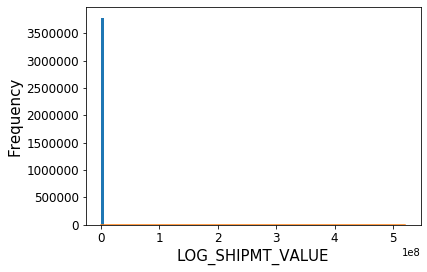

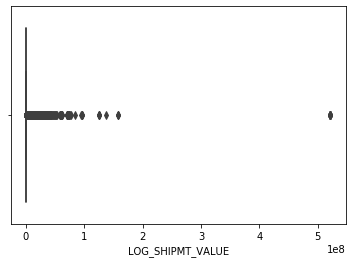

In [28]:
# Check statistics for SHIPMT_VALUE
# Analyze SHIPMT_VALUE for distribution, Outliers and Skewness
dataset["LOG_SHIPMT_VALUE"] = dataset["SHIPMT_VALUE"]

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_VALUE"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_VALUE"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_VALUE"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_VALUE"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_VALUE"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_VALUE"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_VALUE"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_VALUE"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_VALUE"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_VALUE"])

Mean                           >>> 6.891918244878374
Median                         >>> 6.760414691083428
Mode                           >>> 0    0.693147
dtype: float64
Standard Deviation             >>> 2.320005548216784
Maxiumn                        >>> 20.07179366490681
Minimum                        >>> 0.6931471805599453
Skewness                       >>> 0.0814145019100502


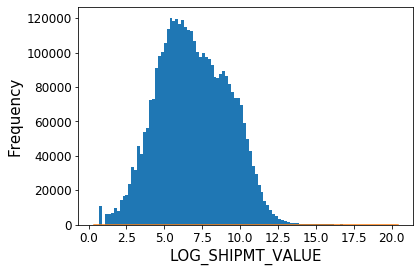

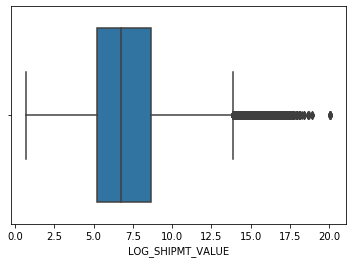

In [29]:
# Tranform data using log method and verify Outlier and skewness
dataset["LOG_SHIPMT_VALUE"] = np.log(dataset["SHIPMT_VALUE"] + 1 )

# Statistics for SHIPMT_VALUE
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_VALUE"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_VALUE"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_VALUE"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_VALUE"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_VALUE"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_VALUE"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_VALUE"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_VALUE"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_VALUE"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_VALUE"])

Mean                           >>> 37264.77859008976
Median                         >>> 340.0
Mode                           >>> 0    1
dtype: int64
Standard Deviation             >>> 880280.4248323328
Maxiumn                        >>> 277029600
Minimum                        >>> 1
Skewness                       >>> 72.6407489860033


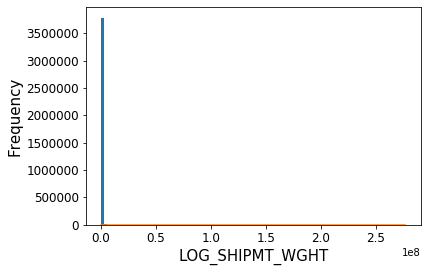

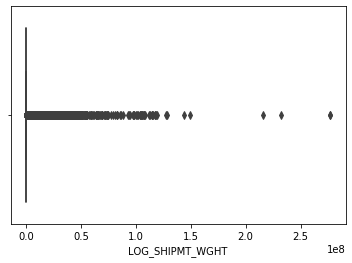

In [30]:
# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_WGHT"] = dataset["SHIPMT_WGHT"]

# Statistics for SHIPMT_WGHT
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_WGHT"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_WGHT"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_WGHT"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_WGHT"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_WGHT"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_WGHT"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_WGHT"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_WGHT"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_WGHT"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_WGHT"])

Mean                           >>> 5.976165507100872
Median                         >>> 5.831882477283517
Mode                           >>> 0    0.693147
dtype: float64
Standard Deviation             >>> 3.446437179412294
Maxiumn                        >>> 19.439634921258072
Minimum                        >>> 0.6931471805599453
Skewness                       >>> 0.09070717428207459


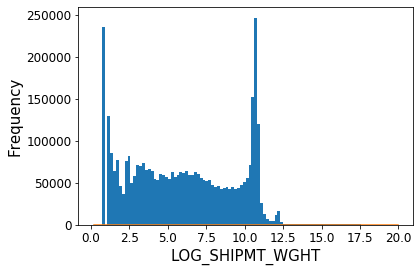

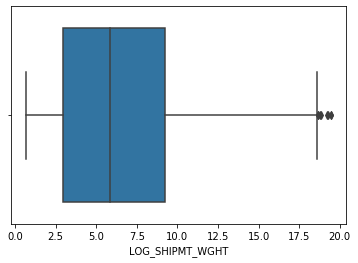

In [31]:
# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_WGHT"] = np.log(dataset["SHIPMT_WGHT"] + 1)

# Statistics for SHIPMT_WGHT
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_WGHT"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_WGHT"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_WGHT"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_WGHT"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_WGHT"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_WGHT"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_WGHT"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_WGHT"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_WGHT"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_WGHT"])

Mean                           >>> 366.328039636535
Median                         >>> 95.0
Mode                           >>> 0    3
dtype: int64
Standard Deviation             >>> 560.2142628282588
Maxiumn                        >>> 5153
Minimum                        >>> 1
Skewness                       >>> 2.207562057678836


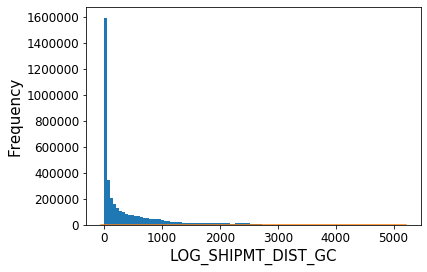

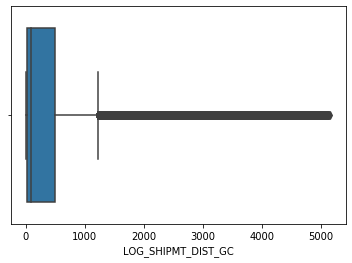

In [32]:

# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_DIST_GC"] = dataset["SHIPMT_DIST_GC"]

# Statistics for SHIPMT_DIST_GC
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_DIST_GC"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_DIST_GC"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_DIST_GC"])

Mean                           >>> 4.5094479338736395
Median                         >>> 4.564348191467836
Mode                           >>> 0    1.386294
dtype: float64
Standard Deviation             >>> 1.9141095302212494
Maxiumn                        >>> 8.54752839121231
Minimum                        >>> 0.6931471805599453
Skewness                       >>> -0.04156643434003815


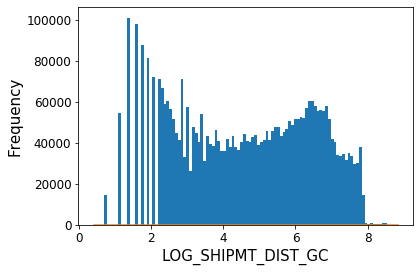

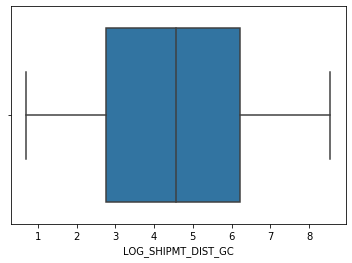

In [33]:
# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_DIST_GC"] = np.log(dataset["SHIPMT_DIST_GC"] + 1)

# Statistics for SHIPMT_DIST_GC
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_DIST_GC"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_DIST_GC"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_DIST_GC"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_DIST_GC"])

Mean                           >>> 443.8153411196087
Median                         >>> 117.0
Mode                           >>> 0    4
dtype: int64
Standard Deviation             >>> 664.657330109862
Maxiumn                        >>> 5711
Minimum                        >>> 1
Skewness                       >>> 2.0778347915212083


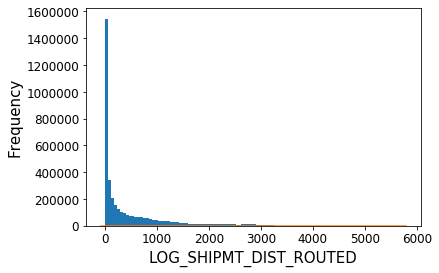

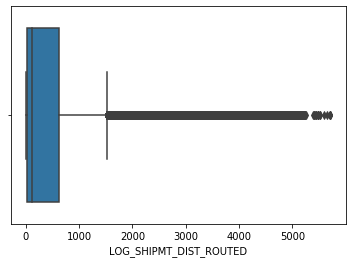

In [34]:

# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_DIST_ROUTED"] = dataset["SHIPMT_DIST_ROUTED"]

# Statistics for SHIPMT_DIST_ROUTED
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_DIST_ROUTED"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_DIST_ROUTED"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_DIST_ROUTED"])

Mean                           >>> 4.705705246778957
Median                         >>> 4.770684624465665
Mode                           >>> 0    1.609438
dtype: float64
Standard Deviation             >>> 1.92630560274613
Maxiumn                        >>> 8.65032450401942
Minimum                        >>> 0.6931471805599453
Skewness                       >>> -0.07593648459474407


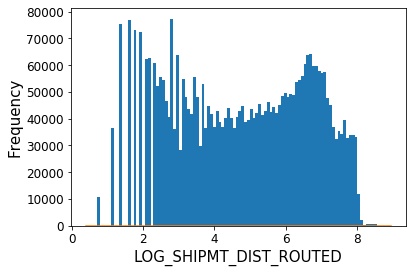

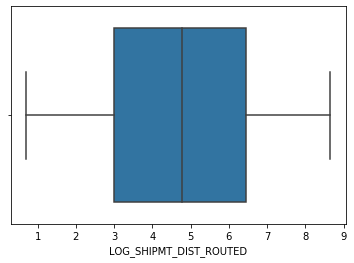

In [35]:
# Tranform data using boxcox method and verify
dataset["LOG_SHIPMT_DIST_ROUTED"] = np.log(dataset["SHIPMT_DIST_ROUTED"] + 1)

# Statistics for SHIPMT_DIST_ROUTED
print(f'{"Mean":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_SHIPMT_DIST_ROUTED"].skew()}')

# Check for distribution
dataset["LOG_SHIPMT_DIST_ROUTED"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_SHIPMT_DIST_ROUTED"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_SHIPMT_DIST_ROUTED"])

Mean                           >>> 2192.499977479222
Median                         >>> 278.7
Mode                           >>> 0    17.1
dtype: float64
Standard Deviation             >>> 18621.430322822544
Maxiumn                        >>> 975000.0
Minimum                        >>> 0.2
Skewness                       >>> 38.617285737647585


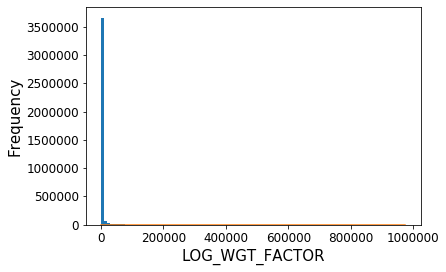

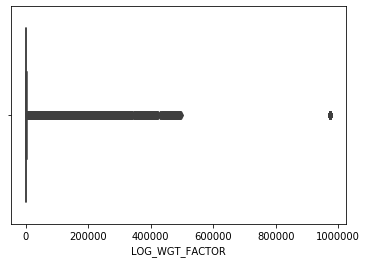

In [36]:

# Tranform data using boxcox method and verify
dataset["LOG_WGT_FACTOR"] = dataset["WGT_FACTOR"]

# Statistics for WGT_FACTOR
print(f'{"Mean":30s} >>> {dataset["LOG_WGT_FACTOR"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_WGT_FACTOR"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_WGT_FACTOR"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_WGT_FACTOR"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_WGT_FACTOR"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_WGT_FACTOR"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_WGT_FACTOR"].skew()}')

# Check for distribution
dataset["LOG_WGT_FACTOR"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_WGT_FACTOR"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_WGT_FACTOR"])

Mean                           >>> 5.749452227371181
Median                         >>> 5.630135934487902
Mode                           >>> 0    2.839078
dtype: float64
Standard Deviation             >>> 1.733694920219976
Maxiumn                        >>> 13.790192749979985
Minimum                        >>> -1.6094379124341003
Skewness                       >>> 0.4195558618967424


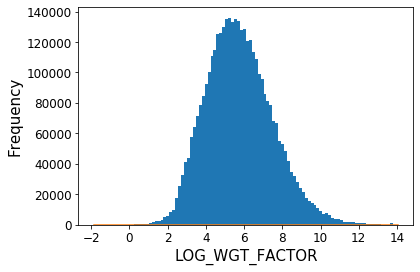

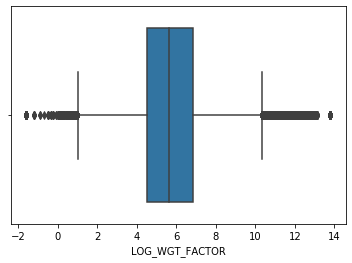

In [37]:
# Tranform data using boxcox method and verify
dataset["LOG_WGT_FACTOR"] = np.log(dataset["WGT_FACTOR"])

# Statistics for WGT_FACTOR
print(f'{"Mean":30s} >>> {dataset["LOG_WGT_FACTOR"].mean()}')
print(f'{"Median":30s} >>> {dataset["LOG_WGT_FACTOR"].median()}')
print(f'{"Mode":30s} >>> {dataset["LOG_WGT_FACTOR"].mode()}')
print(f'{"Standard Deviation":30s} >>> {dataset["LOG_WGT_FACTOR"].std()}')
print(f'{"Maxiumn":30s} >>> {dataset["LOG_WGT_FACTOR"].max()}')
print(f'{"Minimum":30s} >>> {dataset["LOG_WGT_FACTOR"].min()}')
print(f'{"Skewness":30s} >>> {dataset["LOG_WGT_FACTOR"].skew()}')

# Check for distribution
dataset["LOG_WGT_FACTOR"].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Life Expectancy", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
sns.distplot(dataset["LOG_WGT_FACTOR"])
plt.show()

# Check for outliers
sns.boxplot(x=dataset["LOG_WGT_FACTOR"])

In [ ]:
dataset.drop(["SHIPMT_VALUE", "SHIPMT_WGHT", "SHIPMT_DIST_GC", "SHIPMT_DIST_ROUTED", "WGT_FACTOR"],
            axis = 1,
            inplace = True
            )

In [42]:
dataset.LOG_WGT_FACTOR.count()

3792057

In [44]:
# Analyze first and last 10 rows
display("First 10 observations", dataset.head(10))
display("Last 10 observations", dataset.tail(10))

'First 10 observations'

,ORIG_STATE_10,ORIG_STATE_11,ORIG_STATE_12,ORIG_STATE_13,ORIG_STATE_15,ORIG_STATE_16,ORIG_STATE_17,ORIG_STATE_18,ORIG_STATE_19,ORIG_STATE_2,...,SCTG_GROUP_MNRLS,SCTG_GROUP_OTHMF,SCTG_GROUP_PLCHM,SCTG_GROUP_TRANS,SCTG_GROUP_WASTE,LOG_SHIPMT_VALUE,LOG_SHIPMT_WGHT,LOG_SHIPMT_DIST_GC,LOG_SHIPMT_DIST_ROUTED,LOG_WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,7.686621,2.484907,2.708050,2.890372,5.339939
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,5.843544,2.484907,7.760041,7.913887,5.264243
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.342364,8.543835,6.154858,6.363028,3.935740
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.762174,1.945910,1.386294,1.386294,5.475208
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5.963579,6.269096,4.828314,5.308268,5.986703
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,10.685995,9.510593,2.833213,3.135494,5.738184
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,5.826000,9.459308,2.397895,2.772589,7.899487
10,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,4.983607,3.135494,3.091042,3.367296,6.192567
11,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,6.180017,0.693147,6.285998,6.727432,5.272487


'Last 10 observations'

,ORIG_STATE_10,ORIG_STATE_11,ORIG_STATE_12,ORIG_STATE_13,ORIG_STATE_15,ORIG_STATE_16,ORIG_STATE_17,ORIG_STATE_18,ORIG_STATE_19,ORIG_STATE_2,...,SCTG_GROUP_MNRLS,SCTG_GROUP_OTHMF,SCTG_GROUP_PLCHM,SCTG_GROUP_TRANS,SCTG_GROUP_WASTE,LOG_SHIPMT_VALUE,LOG_SHIPMT_WGHT,LOG_SHIPMT_DIST_GC,LOG_SHIPMT_DIST_ROUTED,LOG_WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,,,,,
4547652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.513429,4.143135,3.044522,3.401197,4.863681
4547653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.123261,10.175459,5.068904,5.159055,5.637643
4547654,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,10.068493,8.459352,5.153292,5.209486,5.166499
4547655,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8.825413,7.091742,6.787845,7.104144,4.143135
4547656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.507141,3.663562,1.386294,1.791759,7.426132
4547657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.985821,4.897840,4.812184,5.030438,5.562987
4547658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10.835829,10.305212,6.331502,6.527958,2.995732
4547659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,6.530878,4.927254,2.639057,2.833213,5.101694
4547660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.820016,7.123673,3.044522,3.135494,6.965930
